In [1]:
# TODO
# find a way to present scores (including delay to peak) comfortably
import sys
import pandas as pd
import numpy as np
import ipywidgets
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
CODE_PATH = r"C:\personal\proj_university\seminar\eegtools"
sys.path.insert(0, CODE_PATH)
import data_ingestion, plot, analysis, dashboard
data = data_ingestion.mat_data

In [3]:
def delay_to_peak(vals):
    sig = analysis.Signal(values=vals)
    if sig.isnull():
        return np.nan
    comp = analysis.Component("N",70,130,sig)
    return comp.timeline[comp.values == comp.peak()][0]

In [4]:
data['delay_to_peak'] = np.apply_along_axis(delay_to_peak,1,data['s2'])

In [17]:
data['delay_to_peak'][11,:,32]

array([126.40625, 110.78125, 114.6875 , 102.96875,  71.71875,  87.34375,
       126.40625, 126.40625,       nan,       nan])

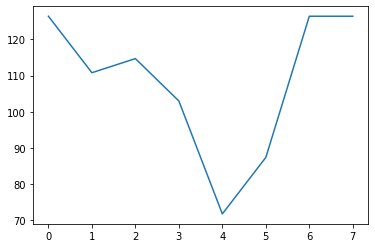

In [16]:
# by trial
plt.plot(np.arange(10),np.nanmean(data['delay_to_peak'][11],1))

In [22]:
data['delay_to_peak'][data['group']=="ASD"]

(22, 10, 34)

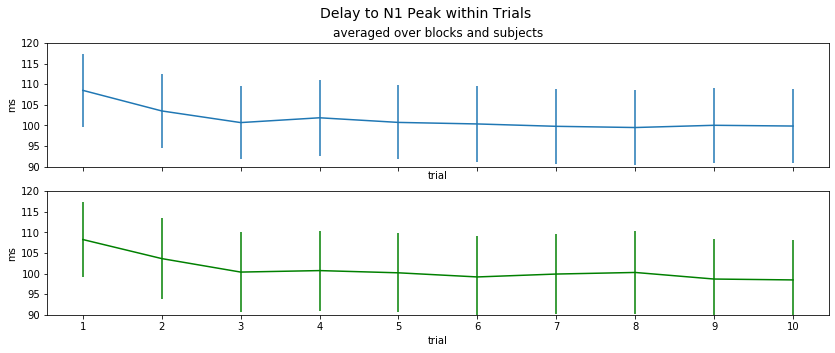

In [72]:
# by trial by sub by block
cont = data['delay_to_peak'][data['group']=="Control"]
asd = data['delay_to_peak'][data['group']=="ASD"]
# np.nanmean(cont, axis=(0,2))
# np.nanmean(asd, axis=(0,2))

fig, ax = plt.subplots(2,1, figsize=(14,5), sharex=True)
fig.suptitle("Delay to N1 Peak within Trials", size=14)
plt.setp(ax, xticks=np.arange(10), xticklabels=np.arange(10)+1, xlabel="trial", ylabel="ms")
ax[0].title.set_text("averaged over blocks and subjects")
ax[0].errorbar(np.arange(10),np.nanmean(cont, axis=(0,2)),
               yerr=np.nanstd(cont, axis=(0,2))/2)
ax[0].set_ylim(90,120)
ax[1].errorbar(np.arange(10),np.nanmean(asd, axis=(0,2)),
               yerr=np.nanstd(asd, axis=(0,2))/2, c="green")
ax[1].set_ylim(90,120)
plt.show()
# data['delay_to_peak'][11,:,]
# plt.plot(np.arange(10),np.nanmean(data['delay_to_peak'], axis=(0,2)))

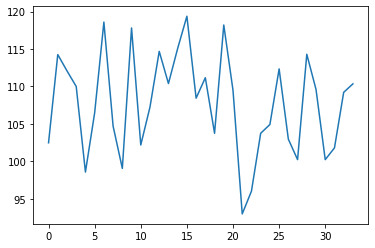

In [24]:
# by block
plt.plot(np.arange(34),np.nanmean(data['delay_to_peak'][45],0))